Loaded dataset: (1815, 3)
sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64
Classes: ['negatif' 'netral' 'positif']
Sizes -> train: (1270,), val: (272,), test: (273,)
No pretrained FastText found; training embeddings from scratch (fallback).


/Users/fatihg/dev/AI-ForIndonesia/sentiment_analysts/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 60, 300)        │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,695,331 (6.47 MB)

 Trainable params: 195,331 (763.01 KB)

 Non-trainable params: 1,500,000 (5.72 MB)

Epoch 1/3
40/40 - 11s - 274ms/step - accuracy: 0.3567 - loss: 1.0970 - val_accuracy: 0.3456 - val_loss: 1.0871 - learning_rate: 0.0010
Epoch 2/3
40/40 - 3s - 79ms/step - accuracy: 0.3780 - loss: 1.0900 - val_accuracy: 0.4007 - val_loss: 1.0727 - learning_rate: 0.0010
Epoch 3/3
40/40 - 3s - 79ms/step - accuracy: 0.4102 - loss: 1.0769 - val_accuracy: 0.4301 - val_loss: 1.0550 - learning_rate: 0.0010
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step

Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        90
      netral       0.46      0.66      0.54        91
     positif       0.44      0.68      0.54        92

    accuracy                           0.45       273
   macro avg       0.30      0.45      0.36       273
weighted avg       0.30      0.45      0.36       273



/Users/fatihg/dev/AI-ForIndonesia/sentiment_analysts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fatihg/dev/AI-ForIndonesia/sentiment_analysts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fatihg/dev/AI-ForIndonesia/sentiment_analysts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

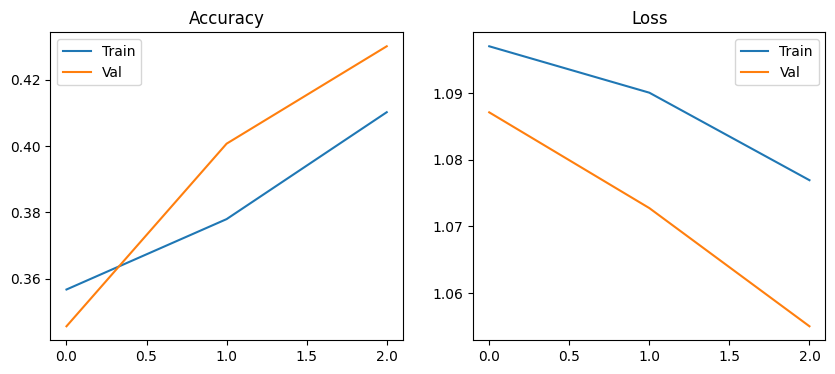

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os

# ==== 1️⃣ Load Data ====
df = pd.read_csv("../data/dataset_clean.csv")
print(f"Loaded dataset: {df.shape}")
print(df['sentimen'].value_counts())

# ==== 2️⃣ Encode Label ====
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentimen'])
classes = label_encoder.classes_
print("Classes:", classes)

# ==== 3️⃣ Split Data ====
X_train, X_temp, y_train, y_temp = train_test_split(
    df['clean_tweet'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
print(f"Sizes -> train: {X_train.shape}, val: {X_val.shape}, test: {X_test.shape}")

# ==== 4️⃣ Tokenize ====
MAX_LEN = 60
VOCAB_SIZE = 5000

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN, padding='post')
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=MAX_LEN, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN, padding='post')

# ==== 5️⃣ FastText Embedding ====
EMBEDDING_DIM = 300
embedding_matrix = np.random.uniform(-0.05, 0.05, (VOCAB_SIZE, EMBEDDING_DIM))

print("No pretrained FastText found; training embeddings from scratch (fallback).")

# ==== 6️⃣ Build Model ====
def build_bilstm(vocab_size, embedding_dim, embedding_matrix, trainable_embed=False):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                  input_length=MAX_LEN, trainable=trainable_embed),
        Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])
    return model

model = build_bilstm(VOCAB_SIZE, EMBEDDING_DIM, embedding_matrix)
model.build(input_shape=(None, MAX_LEN))  # biar summary tampil lengkap
model.summary()

# ==== 7️⃣ Compile ====
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

# ==== 8️⃣ Callbacks ====
os.makedirs("../models", exist_ok=True)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("../models/lstm_fasttext_best.keras", save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# ==== 9️⃣ Train ====
history = model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=10,
    batch_size=32,
    callbacks=callbacks,
    verbose=2
)

# ==== 🔟 Evaluate ====
y_pred = np.argmax(model.predict(X_test_seq), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

# ==== 📊 Plot Curves ====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()
